<h1 id="Project:-Euro-Soccer-Database-Analysis">Project: Euro Soccer Database Analysis<a class="anchor-link" href="#Project:-Euro-Soccer-Database-Analysis">¶</a></h1><h2 id="Table-of-Contents">Table of Contents<a class="anchor-link" href="#Table-of-Contents">¶</a></h2><ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<p><a id="intro"></a></p>
<h2 id="Introduction">Introduction<a class="anchor-link" href="#Introduction">¶</a></h2><p>As a Soccer fan, I have decided to take up the Euro Soccer Database for analysis. I have used DB Browser for SQLite to extract the datasets from the Database. Following are the questions that I have come up for analysis. I have divided the questions or research analysis set into two groups, one related to Players and one to Teams:</p><p></p><p>On Players:</p>
<ol>
<li>Which player has the most penalties? </li>
<li>Attributes of better players than average?</li>
<li>Age and Overall Rating relationship analysis.</li>
</ol>
<p></p><p>On Teams:</p>
<ol>
<li>Which team improved the most over the time period? </li>
<li>Home and Away Games - winning and losing ratio analysis.</li>
</ol>


<h3 id="SQL-Queries-Used:">SQL Queries Used:<a class="anchor-link" href="#SQL-Queries-Used:">¶</a></h3><p>Following SQL Queries are used to combine the tables mentioned in the section above.</p>
<ol>
<li><p>For players dataset: I needed the player's name and birthday from Player table and the attributes from Player_Attributes table.</p>
<div class="highlight"><pre><span></span><span class="k">SELECT</span> <span class="n">p</span><span class="p">.</span><span class="n">player_name</span><span class="p">,</span> <span class="n">p</span><span class="p">.</span><span class="n">birthday</span><span class="p">,</span> <span class="n">pa</span><span class="p">.</span><span class="o">*</span> <span class="k">FROM</span> <span class="n">Player</span> <span class="n">p</span> <span class="k">JOIN</span> <span class="n">Player_Attributes</span> <span class="n">pa</span> <span class="k">ON</span> <span class="n">p</span><span class="p">.</span><span class="n">player_api_id</span> <span class="o">=</span> <span class="n">pa</span><span class="p">.</span><span class="n">player_api_id</span><span class="p">;</span>
</pre></div>
</li>
<li><p>To form team_match_records dataset: I needed the date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal and away_team_goal from the Match Table.</p>
<div class="highlight"><pre><span></span><span class="k">SELECT</span> <span class="kt">date</span><span class="p">,</span> <span class="n">match_api_id</span><span class="p">,</span> <span class="n">home_team_api_id</span><span class="p">,</span> <span class="n">away_team_api_id</span><span class="p">,</span> <span class="n">home_team_goal</span><span class="p">,</span> <span class="n">away_team_goal</span> <span class="k">FROM</span> <span class="k">Match</span><span class="p">;</span>
</pre></div>
</li>
</ol>


<h3 id="Importing-Packages">Importing Packages<a class="anchor-link" href="#Importing-Packages">¶</a></h3>

In [1]:

# importing the libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

<p><a id="wrangling"></a></p>
<h2 id="Data-Cleaning-and-Wrangling---Players">Data Cleaning and Wrangling - Players<a class="anchor-link" href="#Data-Cleaning-and-Wrangling---Players">¶</a></h2>


In [2]:
# Load the players dataset
df_player_records = pd.read_csv('players.csv')



<h3 id="Perform-Data-Check-and-Inspections">Perform Data Check and Inspections<a class="anchor-link" href="#Perform-Data-Check-and-Inspections">¶</a></h3>


In [3]:
# Checking the overall data information and types of the data
df_player_records.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
player_name            183978 non-null object
birthday               183978 non-null object
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_pas

In [8]:
# check the dimensions of the dataset
df_player_records.shape

(183978, 44)

In [9]:

# check for duplication of data
df_player_records.duplicated().sum()


0

<p>For my analysis on this data, I'm interested in the columns player_api_id, player_name, birthday, date, overall_rating, penalties and the goalkeeper attributes. 
So, I'll create a new data frame with just these columns.</p>

In [3]:

df_players = df_player_records[['player_api_id','player_name','birthday','date','overall_rating','penalties','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']]



In [11]:
# check if the created dataframe is correct
df_players.head(2)


,player_api_id,player_name,birthday,date,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,2016-02-18 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,2015-11-19 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0


In [12]:
# check for null values
df_players.isnull().sum()

player_api_id       0
player_name         0
birthday            0
date                0
overall_rating    836
penalties         836
gk_diving         836
gk_handling       836
gk_kicking        836
gk_positioning    836
gk_reflexes       836
dtype: int64

<p>Since, the datatypes for the missing values are all float types, I'll fill the null values with 0 as replacing with 0 will not impact my calculations.</p>

In [4]:
# fill null values with 0
df_players.fillna(0, inplace = True)

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<h3 id="Quick-Notes-on-Data-Cleaning-and-Data-Wrangling.">Quick Notes on Data Cleaning and Data Wrangling.<a class="anchor-link" href="#Quick-Notes-on-Data-Cleaning-and-Data-Wrangling.">¶</a></h3><ol>
<li>For this dataset players, there are no duplicate records.</li>
<li>In total there are 183978 rows with 44 columns.</li>
<li>Removed those columns which will not be used for my analysis.</li>
<li>Filled the missing values with 0 as the data types of the missing values which I'm interested are of float data types.</li>
</ol>

<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="1.-Which-player-had-the-most-penalties?">1. Which player had the most penalties?<a class="anchor-link" href="#1.-Which-player-had-the-most-penalties?">¶</a></h3>

<p>Here for this research question, I'm interested in finding out only the field player (and not goalkeeper) who scored the most penalties.
So, I would like to categorized the players as either Field Players or GoalKeepers. I'm deciding that if the goalkeeper attributes average are greater than 50, then the player is a goalkeeper, otherwise a field player. To do this, I created a temporary dataframe that contains the mean of the goalkeeper attributes for each player id.</p>

In [5]:
# create a temporary dataframe containing goalkeeper attributes average
goalkeeper_attributes_avg = df_players.loc[: , "gk_diving":"gk_reflexes"].mean(axis = 1)

In [6]:
# create a function to check if goalkeeper for each player

def goalkeeper(x):
    if x > 50.0:
        return "Yes"
    else:
        return "No"

In [7]:
# add a column that list whether the player is a goalkeeper or not

df_players['goalkeeper'] = goalkeeper_attributes_avg.apply(lambda x: goalkeeper(x))

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# check if the dataset is still correct
df_players.head(2)

,player_api_id,player_name,birthday,date,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goalkeeper
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,2016-02-18 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0,No
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,2015-11-19 00:00:00,67.0,48.0,6.0,11.0,10.0,8.0,8.0,No


Now lets create a separate dataframe for field players and goalkeepers, so that it will be easy to manipulate.

In [8]:
# create field players and goalkeeper separate dataframes

# only goalkeeper dataset
df_players_goalkeeper = df_players.query('goalkeeper == "Yes"')

# only field players_dataset
df_players_field = df_players.query('goalkeeper == "No"')

In [10]:
# checking how many field players in total
df_players_field.shape

(169280, 12)

In [9]:
# lets create a dataframe that gives the total penalties scored by each player
df_penalties_field = df_players_field.groupby('player_api_id')['penalties'].sum()

In [12]:
# checking the penalties dataset
df_penalties_field.head(2)

player_api_id
2625    867.0
2752    744.0
Name: penalties, dtype: float64

In [10]:
# resetting the index of the dataset for easy manipulation
df_penalties_field = df_penalties_field.to_frame().reset_index()
df_penalties_field.head(2)

,player_api_id,penalties
0,2625,867.0
1,2752,744.0


In [14]:
# check the overall statistics of the penalties dataset
df_penalties_field.describe()

,player_api_id,penalties
count,10229.000000,10229.000000
mean,159577.953857,942.204028
std,162422.777656,637.338340
min,2625.000000,0.000000
25%,35996.000000,434.000000
50%,98363.000000,816.000000
75%,213501.000000,1326.000000
max,750584.000000,4314.000000


Now, the statistical description of the penalties dataset shows there are in total 10229 records of penalties with an average of around 942 penalties scored by the field players and the maximum scored is 4314.

In [11]:
# fetch the player_api_id of the player who scored the max penalties (4314)
df_penalties_field.loc[df_penalties_field['penalties'] == 4314]

,player_api_id,penalties
3704,41269,4314.0


In [16]:
# fetching the name of the field player with player_api_id 41269
df_players.loc[df_players['player_api_id'] == 41269].head(1)

,player_api_id,player_name,birthday,date,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goalkeeper
6657,41269,Alessio Cerci,1987-07-23 00:00:00,2016-04-28 00:00:00,77.0,76.0,9.0,14.0,7.0,12.0,9.0,No


<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="2.-Attributes-of-better-players-than-average.">2. Attributes of better players than average.<a class="anchor-link" href="#2.-Attributes-of-better-players-than-average.">¶</a></h3>

I will try to analyse the attributes of "better players than average" for Goalkeepers, by comparing the averages of the attributes specific to goalkeepers based on the Overall Rating. So for this analysis, I'll use the Goalkeeper specific dataset.

In [17]:
# checking how many total goalkeepers are there in the dataset
df_players_goalkeeper.shape

(14698, 12)

In [18]:
df_players_goalkeeper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14698 entries, 695 to 183538
Data columns (total 12 columns):
player_api_id     14698 non-null int64
player_name       14698 non-null object
birthday          14698 non-null object
date              14698 non-null object
overall_rating    14698 non-null float64
penalties         14698 non-null float64
gk_diving         14698 non-null float64
gk_handling       14698 non-null float64
gk_kicking        14698 non-null float64
gk_positioning    14698 non-null float64
gk_reflexes       14698 non-null float64
goalkeeper        14698 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
# grouping the dataset based on each goalkeeper and finding the mean overall rating
df_average_rating_GK = df_players_goalkeeper.groupby('player_api_id')['overall_rating'].mean()

In [13]:
# find the combined average rating from the grouped dataset
average_overall_rating_GK = df_average_rating_GK.mean()
average_overall_rating_GK

66.88798411450055

In [14]:
# lets create a dataset containing the average of the attributes
df_average_ratings_gk = df_players_goalkeeper.groupby('player_api_id').mean()

In [15]:
# checking the dataset
df_average_ratings_gk.head(2)

,overall_rating,penalties,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,
2796,64.6,21.533333,73.666667,59.000,59.866667,57.933333,69.533333
2984,68.5,55.500000,72.750000,63.375,62.500000,63.125000,73.625000


In [15]:
# creating different datasets for better than average and lesser than average goalkeepers

# for better than average goalkeepers
df_better_goalkeepers = df_average_ratings_gk.query('overall_rating >= {}'.format(average_overall_rating_GK))

# for lesser than average goalkeepers
df_lesser_goalkeepers = df_average_ratings_gk.query('overall_rating < {}'.format(average_overall_rating_GK))

In [24]:
# checking the columns and data informations
df_better_goalkeepers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 2984 to 698273
Data columns (total 7 columns):
overall_rating    474 non-null float64
penalties         474 non-null float64
gk_diving         474 non-null float64
gk_handling       474 non-null float64
gk_kicking        474 non-null float64
gk_positioning    474 non-null float64
gk_reflexes       474 non-null float64
dtypes: float64(7)
memory usage: 29.6 KB


In [16]:
# droping the overall_rating and penalties columns as they are no longer required.
df_better_goalkeepers.drop(['overall_rating','penalties'], inplace = True, axis = 1)
df_lesser_goalkeepers.drop(['overall_rating','penalties'], inplace = True, axis = 1)

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
# checking the mean values for the attributes for better goalkeepers
print(df_better_goalkeepers.mean())

# checking the mean values for the attributes for lesser goalkeepers
print(df_lesser_goalkeepers.mean())

gk_diving         73.370567
gk_handling       70.402880
gk_kicking        67.797872
gk_positioning    71.367456
gk_reflexes       74.971756
dtype: float64
gk_diving         63.662368
gk_handling       60.073154
gk_kicking        59.134853
gk_positioning    60.658438
gk_reflexes       64.898287
dtype: float64


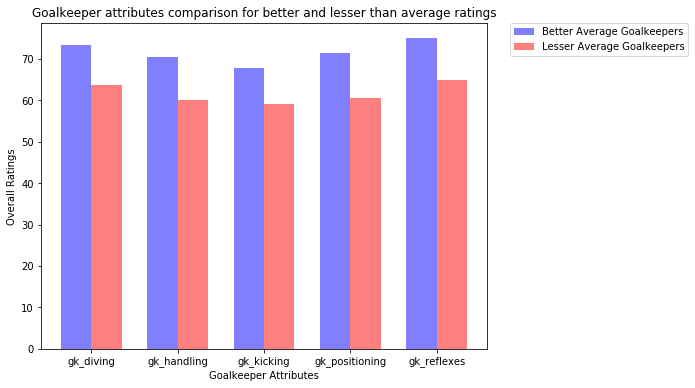

In [19]:
# Setting up the parameters for plotting the dataset comparisons and plotting the multi bar chart

plt.figure(figsize = [8,6]);
heights1 = df_better_goalkeepers.mean()
heights2 = df_lesser_goalkeepers.mean()
ind = np.arange(len(heights1))
width = 0.35

# plot bars
better_gk = plt.bar(ind, heights1, width, color='b', alpha=.5, label='Better Average Goalkeepers')
lesser_avg_gk = plt.bar(ind + width, heights2, width, color='r',alpha = 0.5, label='Lesser Average Goalkeepers')

# title and labels
plt.ylabel('Overall Ratings')
plt.xlabel('Goalkeeper Attributes')
plt.title('Goalkeeper attributes comparison for better and lesser than average ratings')
plt.rcParams['figure.figsize'] = (10,8)

locations = ind + width / 2  # xtick locations
labels = ['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 2, borderaxespad = 0.);

<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="3.-Age-and-Overall-Rating-relationship-analysis.">3. Age and Overall Rating relationship analysis.<a class="anchor-link" href="#3.-Age-and-Overall-Rating-relationship-analysis.">¶</a></h3>

<p>To perform this analysis, I will used the Field Players dataset. Will derived the age based on the birthday and the date columns. Find the overall ratings for various age groups and will derived the relationship.</p>

In [18]:
# create a dataset containing only the birthday, date and overall_ratings from the Field Players dataset.
df_players_age = df_players_field[['birthday','date','overall_rating']]
df_players_age.head(2)

,birthday,date,overall_rating
0,1992-02-29 00:00:00,2016-02-18 00:00:00,67.0
1,1992-02-29 00:00:00,2015-11-19 00:00:00,67.0


In [21]:
# check the data types of the birthday and the date columns
df_players_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169280 entries, 0 to 183977
Data columns (total 3 columns):
birthday          169280 non-null object
date              169280 non-null object
overall_rating    169280 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


In [19]:
# converting the birthday and date columns to date type
df_players_age['birthday'] = pd.to_datetime(df_players_age['birthday'])
df_players_age['date'] = pd.to_datetime(df_players_age['date'])

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# adding a column listing the age for each row
df_players_age['age'] = df_players_age['date'].dt.year - df_players_age['birthday'].dt.year

C:\Users\cr174k\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df_players_age.head(2)

,birthday,date,overall_rating,age
0,1992-02-29,2016-02-18,67.0,24
1,1992-02-29,2015-11-19,67.0,23


In [21]:
# finding the average ratings for each age group in the dataset
df_age_ratings = df_players_age.groupby('age').mean()

In [26]:
# finding the number of players in each group
df_players_age.groupby('age').count()

,birthday,date,overall_rating
age,,,
8,1,1,1
9,24,24,24
10,99,99,99
11,227,227,227
12,318,318,318
13,442,442,442
14,496,496,496
15,610,610,610
16,687,687,687


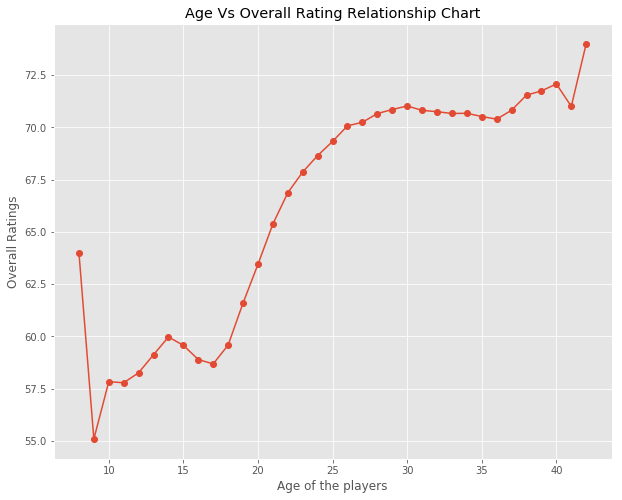

In [27]:
# setting up the parameters and plotting the scatter plot

locations = df_age_ratings.index.values
height = df_age_ratings['overall_rating']
plt.style.use('ggplot')

# plotting scatter plot
plt.plot(locations, height,'-o')

# set title and labels
plt.title('Age Vs Overall Rating Relationship Chart')
plt.xlabel('Age of the players')
plt.ylabel('Overall Ratings')
plt.rcParams['figure.figsize'] = (8,6)

<p><a id="wrangling"></a></p>
<h2 id="Data-Cleaning-and-Wrangling---Teams">Data Cleaning and Wrangling - Teams<a class="anchor-link" href="#Data-Cleaning-and-Wrangling---Teams">¶</a></h2>

In [2]:
# Load the Team Match Records dataset
df_team_records = pd.read_csv('team_match_records.csv')

<h3 id="Perform-Data-Check-and-Inspections">Perform Data Check and Inspections<a class="anchor-link" href="#Perform-Data-Check-and-Inspections">¶</a></h3>

In [31]:
# Checking the overall data information and types of the data
df_team_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_team_score     0 non-null float64
away_team_score     0 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.6+ MB


In [32]:
# check the dimensions of the dataset
df_team_records.shape

(25979, 8)

In [33]:
# check for duplication of data
df_team_records.duplicated().sum()

0

In [34]:
df_team_records.isnull().sum()

date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_team_score     25979
away_team_score     25979
dtype: int64

<h3 id="Quick-Notes-on-Data-Cleaning-and-Data-Wrangling.">Quick Notes on Data Cleaning and Data Wrangling.<a class="anchor-link" href="#Quick-Notes-on-Data-Cleaning-and-Data-Wrangling.">¶</a></h3><ol>
<li>For this dataset team match records, there are no duplicate records.</li>
<li>In total there are 25979 rows with 6 columns.</li>
<li>No null data.</li>
<li>Data types for all columns are of type Int64 except date.</li>
</ol>

<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="1.-Which-team-improved-the-most-over-the-time-period?">1. Which team improved the most over the time period?<a class="anchor-link" href="#1.-Which-team-improved-the-most-over-the-time-period?">¶</a></h3>

<p>To answer this research question, I will take two years for comparison say 2008 and 2016 and try to find out which Team has the highest total net points compared to what they have in 2008 and in 2016. This net point is the aggregate score for a team when they win, draw or loss a game.</p>

In [3]:
# first of all lets convert the date column datatype from String to Date type
df_team_records['date'] = pd.to_datetime(df_team_records['date'])

In [4]:
# create functions to generate team scores for both home and away teams.
# assuming 3 points for win, 0 points for loss and 1 pt to each team when draw.

def calculate_score_home(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return 3
    elif data['home_team_goal'] == data['away_team_goal']:
        return 1
    else:
        return 0
    
def calculate_score_away(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return 0
    elif data['home_team_goal'] == data['away_team_goal']:
        return 1
    else:
        return 3

In [5]:
# add two new columns that contains the points scored by the home and away teams for each match
df_team_records['home_team_score'] = df_team_records.apply(lambda data: calculate_score_home(data), axis = 1)
df_team_records['away_team_score'] = df_team_records.apply(lambda data: calculate_score_away(data), axis = 1)

In [38]:
# checking dataset
df_team_records.head(2)

,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_score,away_team_score
0,2008-08-17,492473,9987,9993,1,1,1,1
1,2008-08-16,492474,10000,9994,0,0,1,1


In [6]:
# now lets create two datasets for the years 2008 and 2016
# for 2008
df_team_records_2008 = df_team_records.query('date.dt.year == 2008')
# for 2016
df_team_records_2016 = df_team_records.query('date.dt.year == 2016')

In [40]:
# checking how many records in each dataset
df_team_records_2008.shape

(1613, 8)

In [41]:
df_team_records_2016.shape

(1630, 8)

In [7]:
# lets create a mask dataset each for 2008 and 2016 by grouping w.r.t home_team_api_id and home_team_score

df_team_records_2008_home_masked = df_team_records_2008.groupby(['home_team_api_id','home_team_score']).count()
df_team_records_2016_home_masked = df_team_records_2016.groupby(['home_team_api_id','home_team_score']).count()

In [8]:
# similaryly create a mask dataset each for 2008 and 2016 by grouping w.r.t away_team_api_id and away_team_score

df_team_records_2008_away_masked = df_team_records_2008.groupby(['away_team_api_id','away_team_score']).count()
df_team_records_2016_away_masked = df_team_records_2016.groupby(['away_team_api_id','away_team_score']).count()

In [29]:
# check how the dataset looks
df_team_records_2008_home_masked.head(3)

date  match_api_id  away_team_api_id  \
home_team_api_id home_team_score                                         
1601             0                   2             2                 2   
                 1                   2             2                 2   
                 3                   5             5                 5   

                                  home_team_goal  away_team_goal  \
home_team_api_id home_team_score                                   
1601             0                             2               2   
                 1                             2               2   
                 3                             5               5   

                                  away_team_score  
home_team_api_id home_team_score                   
1601             0                              2  
                 1                              2  
                 3                              5

In [9]:
# lets reset the index and add as columns the home_api_id and home_team_score for both 2008 and 2016 datasets

df_team_records_2008_home_masked.reset_index(level=['home_team_api_id', 'home_team_score'], inplace = True)
df_team_records_2016_home_masked.reset_index(level=['home_team_api_id', 'home_team_score'], inplace = True)

In [10]:
# similary lets reset the index for the away datasets for both 2008 and 2016 datasets

df_team_records_2008_away_masked.reset_index(level=['away_team_api_id', 'away_team_score'], inplace = True)
df_team_records_2016_away_masked.reset_index(level=['away_team_api_id', 'away_team_score'], inplace = True)

In [32]:
# check the dataset
df_team_records_2008_home_masked.head(6)

,home_team_api_id,home_team_score,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,away_team_score
0,1601,0,2,2,2,2,2,2
1,1601,1,2,2,2,2,2,2
2,1601,3,5,5,5,5,5,5
3,1957,0,2,2,2,2,2,2
4,1957,1,2,2,2,2,2,2
5,1957,3,4,4,4,4,4,4


The above group masked dataset represents the number of scores each game gets in total. For example. for team 1601, they lost 2 games, 2 draws and 5 wins at home in 2008.

In [11]:
# lets pivot the datasets to group in terms of team_api_id and the number of respective scores they get for each games

# pivoting for 2008 and 2016 home game datasets
df_team_records_2008_home_masked_final = df_team_records_2008_home_masked.pivot(index='home_team_api_id', columns='home_team_score', values='match_api_id')
df_team_records_2016_home_masked_final = df_team_records_2016_home_masked.pivot(index='home_team_api_id', columns='home_team_score', values='match_api_id')

# pivoting for 2008 and 2016 away game datasets
df_team_records_2008_away_masked_final = df_team_records_2008_away_masked.pivot(index='away_team_api_id', columns='away_team_score', values='match_api_id')
df_team_records_2016_away_masked_final = df_team_records_2016_away_masked.pivot(index='away_team_api_id', columns='away_team_score', values='match_api_id')

In [34]:
#check the data

df_team_records_2008_home_masked_final.head(3)

home_team_score,0,1,3
home_team_api_id,,,
1601,2.0,2.0,5.0
1957,2.0,2.0,4.0
2182,1.0,2.0,5.0


In [35]:
# check for any null data's in all the four datasets
# for 2008 home games dataset
df_team_records_2008_home_masked_final.isnull().sum()

home_team_score
0    19
1    17
3     0
dtype: int64

In [36]:
# for 2016 home games dataset
df_team_records_2016_home_masked_final.isnull().sum()

home_team_score
0    19
1    16
3     4
dtype: int64

In [37]:
# for 2008 away games dataset
df_team_records_2008_away_masked_final.isnull().sum()

away_team_score
0     3
1    16
3    26
dtype: int64

In [38]:
# for 2016 away games dataset
df_team_records_2016_away_masked_final.isnull().sum()

away_team_score
0     8
1    17
3    21
dtype: int64

In [12]:
# since the data types are all Int64 types. I'll replace the missing values with 0.

df_team_records_2008_home_masked_final.fillna(0, inplace = True)
df_team_records_2016_home_masked_final.fillna(0, inplace = True)
df_team_records_2008_away_masked_final.fillna(0, inplace = True)
df_team_records_2016_away_masked_final.fillna(0, inplace = True)

In [13]:
# add a column to all the four datasets that gives the total number of games played by each team

df_team_records_2008_home_masked_final['total_games'] = df_team_records_2008_home_masked_final[0] + df_team_records_2008_home_masked_final[1] + df_team_records_2008_home_masked_final[3]
df_team_records_2016_home_masked_final['total_games'] = df_team_records_2016_home_masked_final[0] + df_team_records_2016_home_masked_final[1] + df_team_records_2016_home_masked_final[3]
df_team_records_2008_away_masked_final['total_away_games'] = df_team_records_2008_away_masked_final[0] + df_team_records_2008_away_masked_final[1] + df_team_records_2008_away_masked_final[3]
df_team_records_2016_away_masked_final['total_away_games'] = df_team_records_2016_away_masked_final[0] + df_team_records_2016_away_masked_final[1] + df_team_records_2016_away_masked_final[3]


In [41]:
# check the data
df_team_records_2008_home_masked_final.head(2)

home_team_score,0,1,3,total_games
home_team_api_id,,,,
1601,2.0,2.0,5.0,9.0
1957,2.0,2.0,4.0,8.0


In [14]:
# add a column to all the four datasets that gives the total net scores 
# given by 1 * number of games draw + 3 * number of games win

df_team_records_2008_home_masked_final['net_score'] = (df_team_records_2008_home_masked_final[1] * 1) + (df_team_records_2008_home_masked_final[3] * 3)
df_team_records_2016_home_masked_final['net_score'] = (df_team_records_2016_home_masked_final[1] * 1) + (df_team_records_2016_home_masked_final[3] * 3)
df_team_records_2008_away_masked_final['net_score'] = (df_team_records_2008_away_masked_final[1] * 1) + (df_team_records_2008_away_masked_final[3] * 3)
df_team_records_2016_away_masked_final['net_score'] = (df_team_records_2016_away_masked_final[1] * 1) + (df_team_records_2016_away_masked_final[3] * 3)


In [43]:
df_team_records_2008_home_masked_final.head(2)

home_team_score,0,1,3,total_games,net_score
home_team_api_id,,,,,
1601,2.0,2.0,5.0,9.0,17.0
1957,2.0,2.0,4.0,8.0,14.0


In [15]:
# function to rename the column names for the 2008 and 2016 home games datasets

def ren_cols(col):
    name = str(col) + "_home"
    return name

In [16]:
# rename the columns for 2008 and 2016 home games datasets
df_team_records_2008_home_masked_final.rename(columns = lambda x:ren_cols(x), inplace = True)
df_team_records_2016_home_masked_final.rename(columns = lambda x:ren_cols(x), inplace = True)

In [46]:
#check data
df_team_records_2008_home_masked_final.head(2)

home_team_score,0_home,1_home,3_home,total_games_home,net_score_home
home_team_api_id,,,,,
1601,2.0,2.0,5.0,9.0,17.0
1957,2.0,2.0,4.0,8.0,14.0


In [17]:
# convert the respective home_team_api_id or the away_team_api_id from index to columns so that merging can be performed based 
# team api values
df_team_records_2008_home_masked_final.reset_index(level=['home_team_api_id'], inplace = True)
df_team_records_2016_home_masked_final.reset_index(level=['home_team_api_id'], inplace = True)
df_team_records_2008_away_masked_final.reset_index(level=['away_team_api_id'], inplace = True)
df_team_records_2016_away_masked_final.reset_index(level=['away_team_api_id'], inplace = True)

In [18]:
# combine the home and away games for 2008 and 2016 respectively

df_2008_combined = pd.merge(df_team_records_2008_home_masked_final, df_team_records_2008_away_masked_final, left_on = 'home_team_api_id', right_on = 'away_team_api_id', how = 'inner' )
df_2016_combined = pd.merge(df_team_records_2016_home_masked_final, df_team_records_2016_away_masked_final, left_on = 'home_team_api_id', right_on = 'away_team_api_id', how = 'inner' )


In [49]:
#check the data
df_2008_combined.head(2)

,home_team_api_id,0_home,1_home,3_home,total_games_home,net_score_home,away_team_api_id,0,1,3,total_away_games,net_score
0,1601,2.0,2.0,5.0,9.0,17.0,1601,5.0,2.0,1.0,8.0,5.0
1,1957,2.0,2.0,4.0,8.0,14.0,1957,5.0,4.0,0.0,9.0,4.0


In [19]:
# add a column that gives the total net score OR the aggregate of the home and away games
df_2008_combined['total_score'] = df_2008_combined['net_score_home'] + df_2008_combined['net_score']
df_2016_combined['total_score_2016'] = df_2016_combined['net_score_home'] + df_2016_combined['net_score']

In [20]:
# drop columns not required and create a clean dataset for both 2008 and 2016

df_2008_combined_final = df_2008_combined[['home_team_api_id','total_score']]
df_2016_combined_final = df_2016_combined[['away_team_api_id','total_score_2016']]

In [52]:
df_2008_combined_final.head(2)

,home_team_api_id,total_score
0,1601,22.0
1,1957,18.0


In [53]:
df_2016_combined_final.head(2)

,away_team_api_id,total_score_2016
0,1601,8.0
1,1773,10.0


In [21]:
# merge the final combined datasets to find all the teams and their total scores that played in both the years 2008 and 2016

df_combined_2008_2016 = pd.merge(df_2008_combined_final, df_2016_combined_final, left_on = 'home_team_api_id', right_on = 'away_team_api_id', how = 'inner' )

In [55]:
df_combined_2008_2016.head(2)

,home_team_api_id,total_score,away_team_api_id,total_score_2016
0,1601,22.0,1601,8.0
1,1957,18.0,1957,10.0


In [22]:
# add a column that calculates the difference in the total scores between 2008 and 2016
df_combined_2008_2016['diff_scores'] = df_combined_2008_2016['total_score_2016'] - df_combined_2008_2016['total_score']

In [57]:
# find the maximum difference in the difference of scores

max_diff = df_combined_2008_2016['diff_scores'].max()
max_diff

31.0

In [58]:
# find the team_api_id which has this maximum score difference between 2008 and 2016

df_combined_2008_2016.query('diff_scores == {}'.format(max_diff))

,home_team_api_id,total_score,away_team_api_id,total_score_2016,diff_scores
64,9772,26.0,9772,57.0,31.0


<p><a id="eda"></a></p>
<h2 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h2><h3 id="2.-Home-and-Away-Games---winning-and-losing-ratio-analysis.">2. Home and Away Games - winning and losing ratio analysis.<a class="anchor-link" href="#2.-Home-and-Away-Games---winning-and-losing-ratio-analysis.">¶</a></h3>

<p>To analysis the home and away games winning and losig ratio, will try to find the number of winning games at home and away and the total number of games played by each team. Then the ratio for the win and the loss will be calculated and compared.</p>

In [23]:
# we have the cleaned data set df_team_records
df_team_records.head(2)

,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_score,away_team_score
0,2008-08-17,492473,9987,9993,1,1,1,1
1,2008-08-16,492474,10000,9994,0,0,1,1


In [24]:
# lets group the dataset based on the home team api and home games 

df_home_games = df_team_records.groupby(['home_team_api_id','home_team_score']).count()

# similarly group for away games based on away team api and away games

df_away_games = df_team_records.groupby(['away_team_api_id','away_team_score']).count()

In [25]:
# lets reset the index for easy manipulation for both datasets

df_home_games.reset_index(level=['home_team_api_id', 'home_team_score'], inplace = True)
df_away_games.reset_index(level=['away_team_api_id', 'away_team_score'], inplace = True)

In [26]:
# lets pivot the datasets to group it based on the resuls of the games

df_homes_final = df_home_games.pivot(index='home_team_api_id', columns='home_team_score', values='match_api_id')
df_away_final = df_away_games.pivot(index='away_team_api_id', columns='away_team_score', values='match_api_id')

In [27]:
# check the dataset
df_homes_final.head(2)

home_team_score,0,1,3
home_team_api_id,,,
1601,38.0,28.0,54.0
1773,16.0,13.0,16.0


In [28]:
# check for missing datas
df_homes_final.isnull().sum()

home_team_score
0    0
1    1
3    1
dtype: int64

In [29]:
# fill missing data with 0
df_homes_final.fillna(0,inplace = True)

In [30]:
df_away_final.isnull().sum()

away_team_score
0    0
1    0
3    0
dtype: int64

In [31]:
# add a column that contains the total games played at home and away

df_homes_final['total_home_games'] = df_homes_final[0] + df_homes_final[1] + df_homes_final[3]
df_away_final['total_away_games'] = df_away_final[0] + df_away_final[1] + df_away_final[3]

In [32]:
# calculate the winning, losing and draw ratio for both datasets

# for home dataset
df_homes_final['losing_ratio'] = df_homes_final[0] / df_homes_final['total_home_games']
df_homes_final['draw_ratio'] = df_homes_final[1] / df_homes_final['total_home_games']
df_homes_final['winning_ratio'] = df_homes_final[3] / df_homes_final['total_home_games']

# for away dataset
df_away_final['losing_ratio'] = df_away_final[0] / df_away_final['total_away_games']
df_away_final['draw_ratio'] = df_away_final[1] / df_away_final['total_away_games']
df_away_final['winning_ratio'] = df_away_final[3] / df_away_final['total_away_games']

In [33]:
#check the dataset
df_homes_final.head(3)

home_team_score,0,1,3,total_home_games,losing_ratio,draw_ratio,winning_ratio
home_team_api_id,,,,,,,
1601,38.0,28.0,54.0,120.0,0.316667,0.233333,0.450000
1773,16.0,13.0,16.0,45.0,0.355556,0.288889,0.355556
1957,30.0,27.0,63.0,120.0,0.250000,0.225000,0.525000


In [34]:
df_away_final.head(3)

away_team_score,0,1,3,total_away_games,losing_ratio,draw_ratio,winning_ratio
away_team_api_id,,,,,,,
1601,53,29,38,120,0.441667,0.241667,0.316667
1773,24,15,6,45,0.533333,0.333333,0.133333
1957,59,37,24,120,0.491667,0.308333,0.200000


<p>Now I'll select my favourite 10 teams and check th ratio based on their winning and losing records.
Teams are: ( with their respective team api id's)
Chelsea - 8455
Manchester City - 8456
Real Madrid CF - 8633
FC Barcelona - 8634
Liverpol - 8650
FC Bayern Munich -  9823
Arsenal - 9825
Paris Saint-German - 9847
Juventus - 9885
Valencia CF - 10267</p>

In [35]:
#for only the selected teams

my_teams_home_df = df_homes_final.query('home_team_api_id == 9885 or home_team_api_id == 8455 or home_team_api_id == 9847 or home_team_api_id == 9823 or home_team_api_id == 10267 or home_team_api_id == 8633 or home_team_api_id == 8634 or home_team_api_id == 9825 or home_team_api_id == 8650 or home_team_api_id == 8456')
my_teams_away_df = df_away_final.query('away_team_api_id == 9885 or away_team_api_id == 8455 or away_team_api_id == 9847 or away_team_api_id == 9823 or away_team_api_id == 10267 or away_team_api_id == 8633 or away_team_api_id == 8634 or away_team_api_id == 9825 or away_team_api_id == 8650 or away_team_api_id == 8456')

In [36]:
# setting up the parameter for plotting 
ind = np.arange(len(my_teams_home_df[0])) 

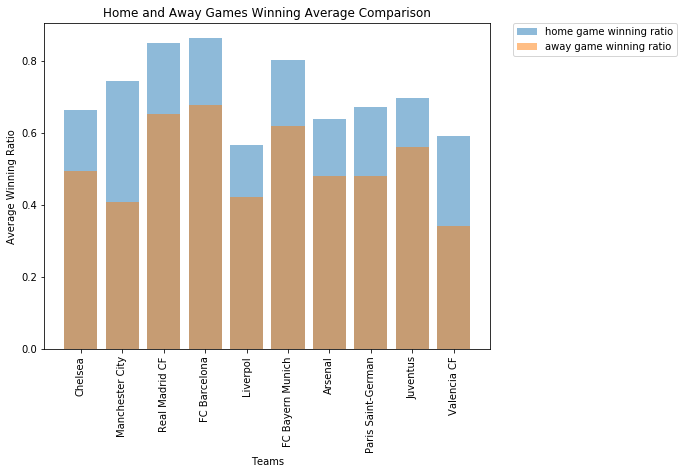

In [38]:
# plotting the winning ratio bar chart

plt.figure(figsize = [8,6]);
home_winning_ratio = my_teams_home_df['winning_ratio']
away_winning_ratio = my_teams_away_df['winning_ratio']


home_winning = plt.bar(ind, home_winning_ratio, alpha=.5, label='home game winning ratio')
away_winning = plt.bar(ind, away_winning_ratio, alpha=.5, label='away game winning ratio')

# title and labels
plt.title('Home and Away Games Winning Average Comparison')
plt.xlabel('Teams')
plt.ylabel('Average Winning Ratio')
plt.rcParams["figure.figsize"] = 8,6


#locations = ind  # xtick locations
labels = ['Chelsea', 'Manchester City','Real Madrid CF','FC Barcelona','Liverpol','FC Bayern Munich','Arsenal','Paris Saint-German','Juventus','Valencia CF']  # xtick labels
plt.xticks(ind, labels, rotation='vertical')
#plt.xticks(teams, rotation='vertical')

# legend
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 2, borderaxespad = 0.);

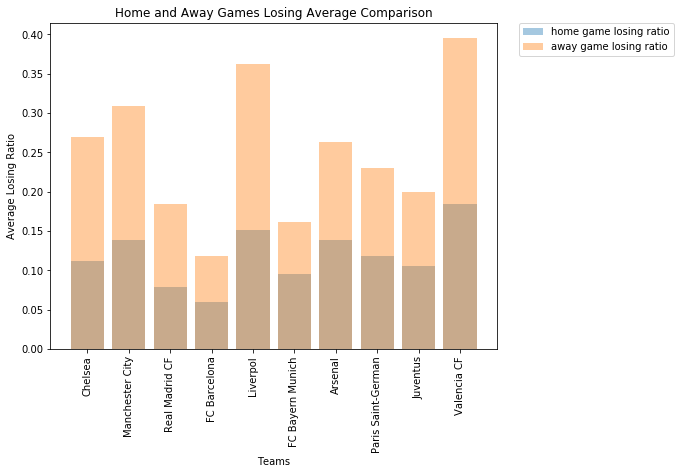

In [39]:
# plotting the losing ratio bar chart
plt.figure(figsize = [8,6]);
home_losing_ratio = my_teams_home_df['losing_ratio']
away_losing_ratio = my_teams_away_df['losing_ratio']


home_losing = plt.bar(ind, home_losing_ratio, alpha=.4, label='home game losing ratio')
away_losing = plt.bar(ind, away_losing_ratio, alpha=.4, label='away game losing ratio')

# title and labels
plt.title('Home and Away Games Losing Average Comparison')
plt.xlabel('Teams')
plt.ylabel('Average Losing Ratio')
plt.rcParams["figure.figsize"] = 8,6


#locations = ind  # xtick locations
labels = ['Chelsea', 'Manchester City','Real Madrid CF','FC Barcelona','Liverpol','FC Bayern Munich','Arsenal','Paris Saint-German','Juventus','Valencia CF']  # xtick labels
plt.xticks(ind, labels, rotation='vertical')
#plt.xticks(teams, rotation='vertical')

# legend
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 2, borderaxespad = 0.);

<h2 id="Conclusions">Conclusions<a class="anchor-link" href="#Conclusions">¶</a></h2><h3 id="Summary-of-my-analysis:">Summary of my analysis:<a class="anchor-link" href="#Summary-of-my-analysis:">¶</a></h3><h4 id="1.-Which-player-has-the-most-penalties?">1. Which player has the most penalties?<a class="anchor-link" href="#1.-Which-player-has-the-most-penalties?">¶</a></h4><p>After analysing the total penalties scored by each player in all games played in all seasons, Alessio Cerci with player_api_id 41269 scores the maximum number of 4314 penalties.</p>
<h4 id="2.-Attributes-of-better-players-than-average?">2. Attributes of better players than average?<a class="anchor-link" href="#2.-Attributes-of-better-players-than-average?">¶</a></h4><p>After analysing the goalkeeper attributes for those whose overall rating is above and below the average rating of all goalkeepers ( 66.88 ), it seems that those goalkeepers whose average rating is more than the average has more attributes scores on all the goalkeeper attributes that includes diving, handling, kicking, positioning and indexes as also depicted in the comparison bar chart.</p>
<h4 id="3.-Age-and-Overall-Rating-relationship-analysis.">3. Age and Overall Rating relationship analysis.<a class="anchor-link" href="#3.-Age-and-Overall-Rating-relationship-analysis.">¶</a></h4><p>This analysis seems to be little contradicting as our bar chart says the overall ratings for those players whose age is greater than 40 have higher overall ratings. But, if we consider the number of players in each age group, we can see a hugh number of difference as compared to those whose age group ranges from 22 to 29 and those above 38. So, considering the number of players in each age group, I think it seems that the consistent  overall rating for age group ranging from 25+ to below 35 are higher consistently.</p>
<h4 id="4.-Which-team-improved-the-most-over-the-time-period?">4. Which team improved the most over the time period?<a class="anchor-link" href="#4.-Which-team-improved-the-most-over-the-time-period?">¶</a></h4><p>For this, after analysing between all teams who played at 2008 season and also played at 2016 season, and considering the net scores. I found that the maximum difference in the netscore in 2008 and that in 2016 is for the team with api_id 9772. It is SL Benfica. So, I will conclude SL Benfica is the team that improved the most comparing 2008 and 2016 seasons on the net aggregate score.</p>
<h4 id="5.-Home-and-Away-Games---winning-and-losing-ratio-analysis.">5. Home and Away Games - winning and losing ratio analysis.<a class="anchor-link" href="#5.-Home-and-Away-Games---winning-and-losing-ratio-analysis.">¶</a></h4><p>Finally, for this analysis, I think teams playing at home have a relatively higher chances of winning as compared to playing away games.  That also implies that teams playing at home have a relatively lower chances of losing as compared to playing away games.</p>